# Question 1

I going to start coding it myself as an exercise. Once I get to the new stuff (fig.add_hline(), etc.), I will ask chatbot to speed things up. My Intial code:

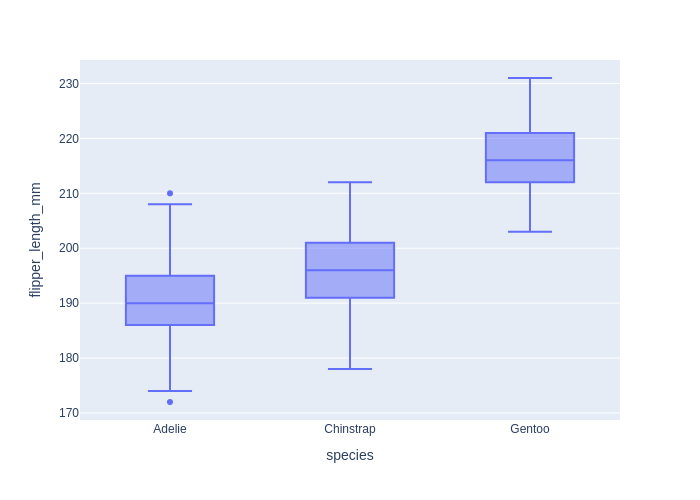

In [25]:
import pandas as pd
import plotly.express as px
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)
px.box(df,x="species",y="flipper_length_mm").show(renderer="png")

So I pasted in my code and the objective into chatBot:
    "[Code] I would like to add location markers for the mean and median of each species. I would aslo like rectangle indicators for the range, iqr, and 2 standard deviations for each species. How can I do that?"

In response it produced this code:

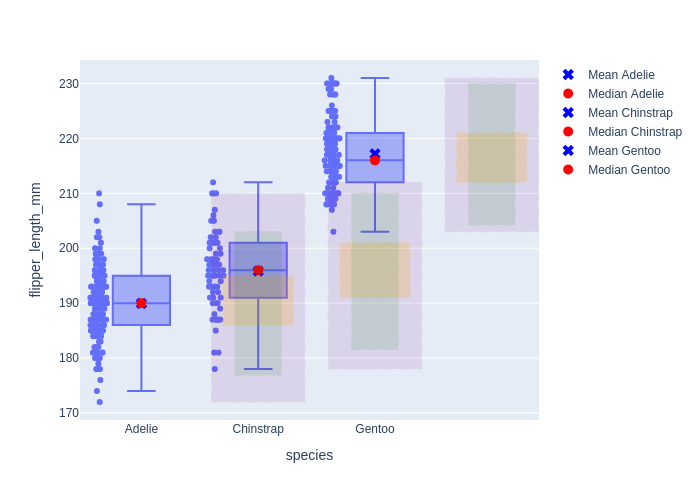

In [26]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

# Calculate summary statistics for each species
summary_stats = df.groupby('species').agg(
    mean_flipper=('flipper_length_mm', 'mean'),
    median_flipper=('flipper_length_mm', 'median'),
    min_flipper=('flipper_length_mm', 'min'),
    max_flipper=('flipper_length_mm', 'max'),
    std_flipper=('flipper_length_mm', 'std'),
    q1_flipper=('flipper_length_mm', lambda x: x.quantile(0.25)),
    q3_flipper=('flipper_length_mm', lambda x: x.quantile(0.75))
).reset_index()

# Create the basic box plot
fig = px.box(df, x="species", y="flipper_length_mm", points="all")

# Get the list of species to use for relative positioning
species_list = df['species'].unique()

# Loop through each species to add mean, median, range, IQR, and ±2σ rectangles
for i, row in summary_stats.iterrows():
    species = row['species']
    mean_flipper = row['mean_flipper']
    median_flipper = row['median_flipper']
    min_flipper = row['min_flipper']
    max_flipper = row['max_flipper']
    std_flipper = row['std_flipper']
    q1_flipper = row['q1_flipper']
    q3_flipper = row['q3_flipper']
    
    # Get the numeric index for the species (to use for shape positioning)
    species_index = species_list.tolist().index(species) + 1

    # Add mean marker
    fig.add_trace(go.Scatter(
        x=[species], y=[mean_flipper],
        mode="markers", marker=dict(symbol="x", size=10, color="blue"),
        name=f'Mean {species}'
    ))

    # Add median marker
    fig.add_trace(go.Scatter(
        x=[species], y=[median_flipper],
        mode="markers", marker=dict(symbol="circle", size=10, color="red"),
        name=f'Median {species}'
    ))
    
    # Add rectangle for the range (min to max)
    fig.add_shape(type="rect",
                  x0=species_index - 0.4, x1=species_index + 0.4,
                  y0=min_flipper, y1=max_flipper,
                  xref='x', yref='y',
                  line=dict(color="purple", width=1, dash="dash"),
                  fillcolor="purple", opacity=0.1)
    
    # Add rectangle for the IQR (Q1 to Q3)
    fig.add_shape(type="rect",
                  x0=species_index - 0.3, x1=species_index + 0.3,
                  y0=q1_flipper, y1=q3_flipper,
                  xref='x', yref='y',
                  line=dict(color="orange", width=1, dash="dash"),
                  fillcolor="orange", opacity=0.2)
    
    # Add rectangle for ±2 standard deviations
    fig.add_shape(type="rect",
                  x0=species_index - 0.2, x1=species_index + 0.2,
                  y0=mean_flipper - 2 * std_flipper, y1=mean_flipper + 2 * std_flipper,
                  xref='x', yref='y',
                  line=dict(color="green", width=1, dash="dash"),
                  fillcolor="green", opacity=0.1)

# Show the plot
fig.show(renderer="png")


Note that these are boxplots not histograms and the rectangles are not in the right spot, but after multiple follow up instructions, ChatGPT did not fix it. Meeting the time limit for this question I will continue on.

Full conversation can be found here: https://chatgpt.com/share/66f3442c-0500-8011-b0b8-ef07ca551b0d

# Question 2


I asked a follow-up: "Now can you do the same with KDE graphs?" 

In response it said:

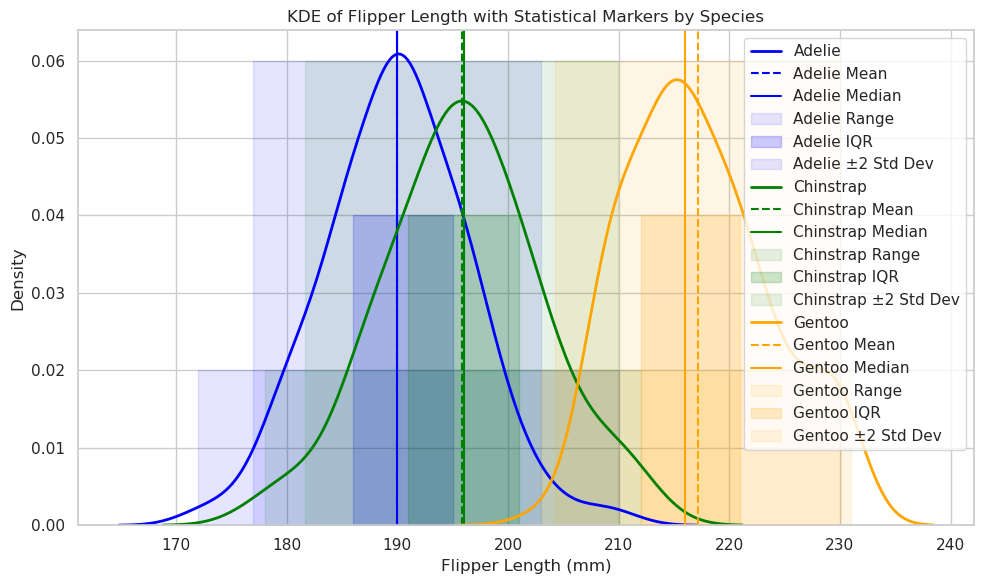

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure and axis object for multiple KDE plots
plt.figure(figsize=(10, 6))

# List of species
species_list = df['species'].dropna().unique()

# Colors for different species
colors = {
    'Adelie': 'blue',
    'Chinstrap': 'green',
    'Gentoo': 'orange'
}

# Loop through each species to plot KDE and statistical markers
for species in species_list:
    # Subset the data for the species
    species_data = df[df['species'] == species]['flipper_length_mm'].dropna()

    # Plot KDE for each species
    sns.kdeplot(species_data, label=species, color=colors[species], linewidth=2)

    # Calculate statistics
    mean_flipper = np.mean(species_data)
    median_flipper = np.median(species_data)
    std_flipper = np.std(species_data)
    q1_flipper = np.percentile(species_data, 25)
    q3_flipper = np.percentile(species_data, 75)
    min_flipper = np.min(species_data)
    max_flipper = np.max(species_data)

    # Add vertical line for the mean
    plt.axvline(mean_flipper, color=colors[species], linestyle='--', label=f'{species} Mean')

    # Add vertical line for the median
    plt.axvline(median_flipper, color=colors[species], linestyle='-', label=f'{species} Median')

    # Add shaded region for the range (min to max)
    plt.fill_betweenx([0, 0.02], min_flipper, max_flipper, color=colors[species], alpha=0.1, label=f'{species} Range')

    # Add shaded region for the IQR (Q1 to Q3)
    plt.fill_betweenx([0, 0.04], q1_flipper, q3_flipper, color=colors[species], alpha=0.2, label=f'{species} IQR')

    # Add shaded region for ±2 standard deviations
    plt.fill_betweenx([0, 0.06], mean_flipper - 2 * std_flipper, mean_flipper + 2 * std_flipper,
                      color=colors[species], alpha=0.1, label=f'{species} ±2 Std Dev')

# Customize the plot
plt.title("KDE of Flipper Length with Statistical Markers by Species")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Density")
plt.legend(loc="upper right")
plt.tight_layout()

# Show the plot
plt.show()

Full conversation can be found here: https://chatgpt.com/share/66f3442c-0500-8011-b0b8-ef07ca551b0d

# Question 3

I said:
    "Boxplots distinctly show the quartiles and range. KDE is an estimate for a continuous distribution of the data. Histogram is a blend of the two, showing counts of data within specified bin widths. Each of these graphs have their own perks."

In response chatBot explained the pros and cons of each graph.

"Exactly! Each of these visualizations—boxplots, KDE plots, and histograms—serve different purposes, providing unique insights into data distribution. 

[...]

Summary:
Boxplots are best for comparing distributions, identifying outliers, and summarizing data.
KDEs are useful for understanding the continuous probability distribution and for seeing multiple peaks or modalities.
Histograms offer an intuitive view of data counts across ranges, combining elements of both boxplots and KDEs."

I personally like boxplots because it most useful when you have multiple data sets. Most statisical problems involve many data sets, and the boxplots do the best job for comparison. You can easily compare the quartiles, spreads, and centers.

# Question 4

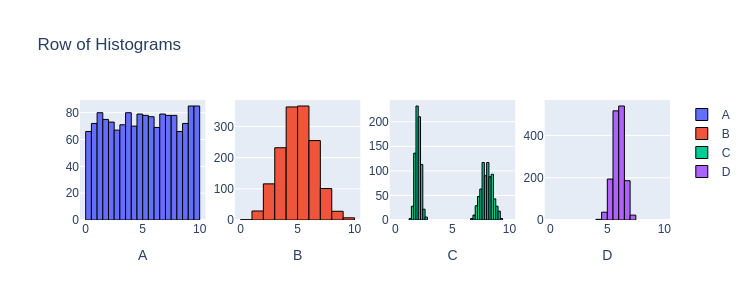

In [11]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

1. Graphs A and B have similar centers (5) and similar variances (high).
2. Graphs C and D have similar centers (6) but different variances (high,low).
3. Graphs B and C have different centers (5,6) and similar variances (high).
4. Graphs A and D have different centers (5,6) and different variances (high, low).


# Question 5

I ask:
    "what is relationship between median/mean (greater less than) depending on skewness of data?"
    
It responds:
    "Right-skewed: mean > median.
    Left-skewed: mean < median.
    Symmetric: mean ≈ median."

So I ask what the code below does. The summary of what the chatbot said was:
1. Generates a 1000 entry data set (left-skewed)
2. Creates a histogram of the data.
3. Calculates mean and median of sample
4. Generates another sample (this time right-skewed)
5. Prints the values for comparison

In my own words:
The median is affected less by skewness than the mean. This means that if the graph is skewed right, the mean will be pulled right farther than the median, making the median less than the mean. If the graph is skewed left, the mean will be pulled left farther than the median, making the median greater than the mean. 

Editing/Extending Code to show this:

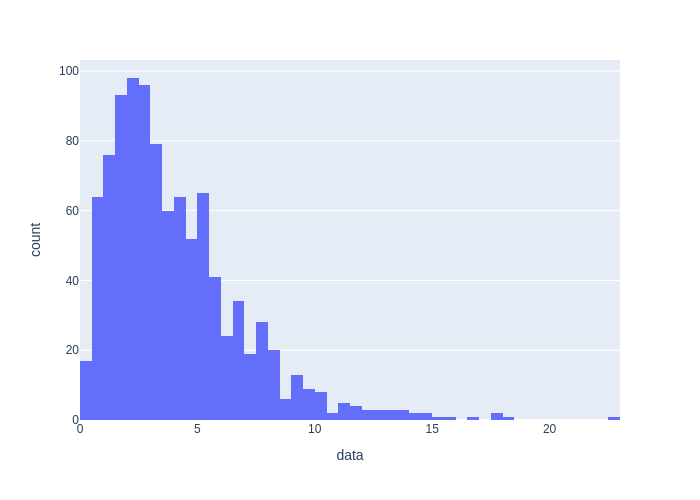

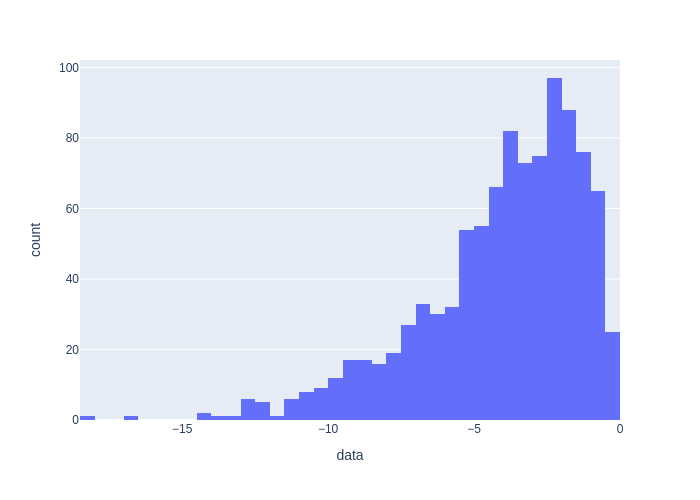

Sample 1 Mean: 4.077882386311353 Median: [3.35908919]
In this case mean is greater than median so right skewed
Sample 2 Mean: -4.069050310869565 Median: [-3.5087949]
In this case mean is less than median so left skewed


In [24]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

mean1 = sample1.mean()
median1 = np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig1.show(renderer="png")
px.histogram(pd.DataFrame({'data': sample2}), x="data").show(renderer="png")

mean2 = sample2.mean()
median2 = np.quantile(sample2, [0.5])

print("Sample 1 Mean: " + str(mean1) + " Median: " + str(median1))
print("In this case mean is greater than median so right skewed")
print("Sample 2 Mean: " + str(mean2) + " Median: " + str(median2))
print("In this case mean is less than median so left skewed")

# Question 6

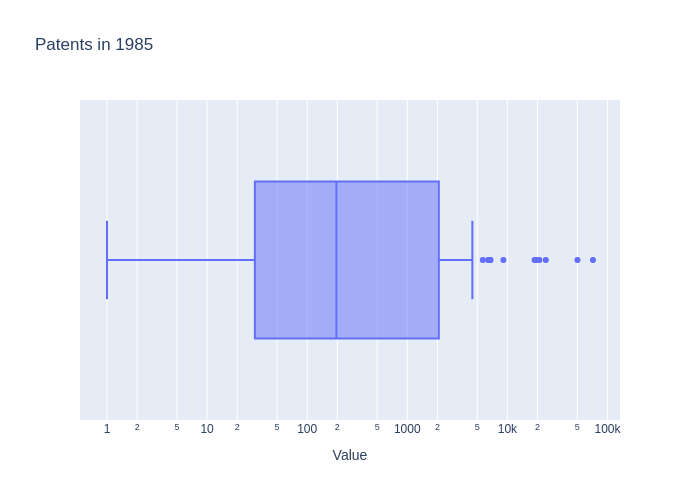

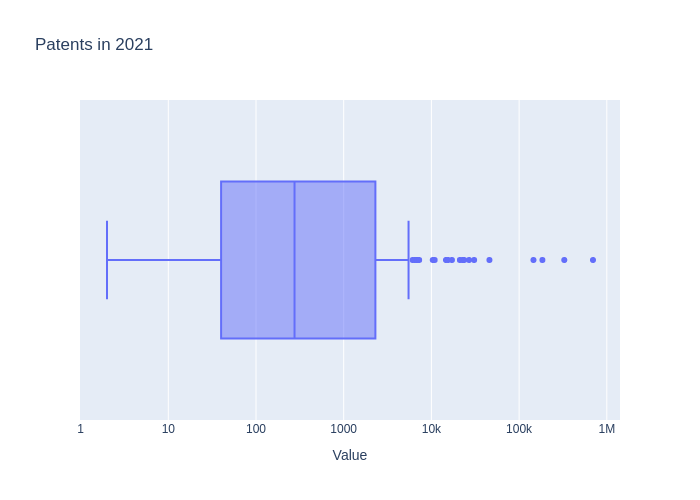

In [23]:
import pandas as pd
import plotly.express as px
df=pd.read_csv("https://data.un.org/_Docs/SYB/CSV/SYB66_264_202310_Patents.csv", encoding="iso-8859-1", header=1)
df=df.rename(columns={"Unnamed: 1":"Region"})
df['Value']=df['Value'].str.replace(",","").astype("float")
exclude_regions = ['Total, all countries or areas', 'Africa', 'Asia', 'Europe', 'Americas', 'Oceania']
df = df[~df['Region'].isin(exclude_regions)]
patents_2021=df[(df["Series"]=="Grants of patents (number)") & (df["Year"]==2021)]
patents_1985=df[(df["Series"]=="Grants of patents (number)") & (df["Year"]==1985)]

px.box(patents_1985,x="Value",log_x=True,title="Patents in 1985",hover_name="Region").show(renderer="png")
px.box(patents_2021,x="Value",log_x=True,title="Patents in 2021",hover_name="Region").show(renderer="png")

I tried to use ChatBot to design charts for me but I found it largely easier to produce code myself. As a result, the code above was made 90% by myself. I only required assistance with the excluded_regions filter and the hover_name argument. From the top two box plots, you can see the distribution of patents between the years of 1985 and 2021. The overall pattern is that the number of patents increased dramatically. Namely, using the hover feature (that won't work with the png rendering, so you'll just need to trust me on this) you can see that the United States had the most patents in 1985 with about 70,000, but now China has the most with nearly 700,000. The median in 1985 was only 196, which increased to 275 in 2021, showing patents numbers on are the rise.

My conversation with ChatBot can be found here: https://chatgpt.com/share/66f4c210-9ae0-8011-98a3-a0f6af24ff3d


# Question 7

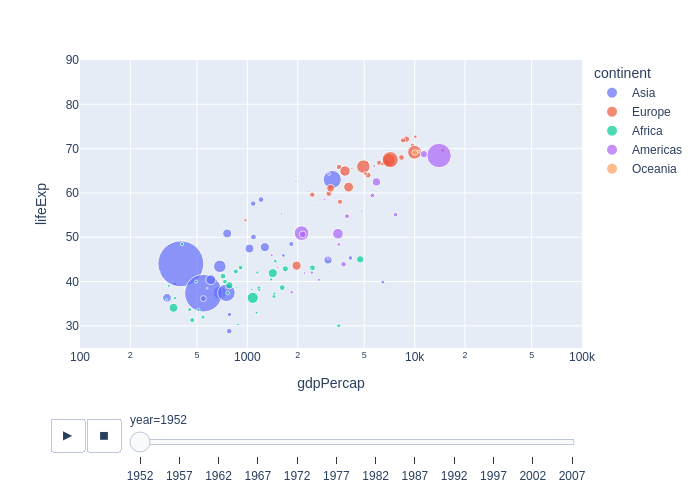

In [27]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=50, range_x=[100,100000], range_y=[25,90]).show(renderer="png")

# Question 8

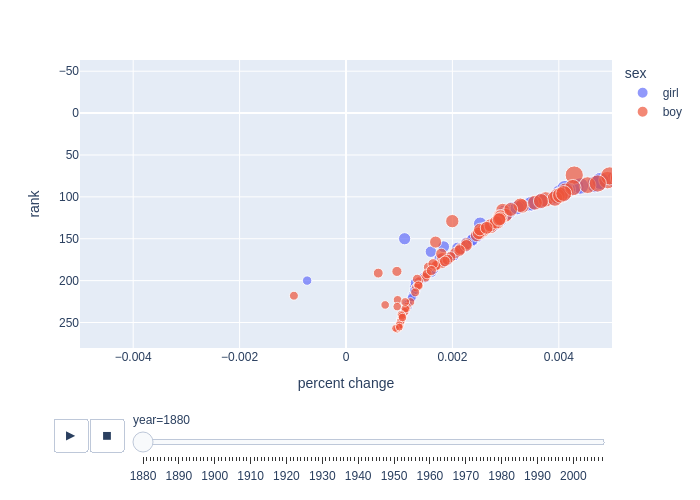

In [28]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

# Question 9

Yes.